In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Task 1: Exploratory Data Analysis (EDA)

In [19]:
df= pd.read_csv('mushroom.csv')

In [21]:
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [23]:
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [25]:
df.duplicated().any()

True

In [27]:
df.duplicated().sum()

1024

In [29]:
df.drop_duplicates(inplace=True)

In [31]:
df.duplicated().sum()

0

In [33]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,976.000000,976.000000,976.000000
mean,633.275615,8.524684,12.598566
std,372.262936,3.703043,6.987077
min,0.000000,2.000000,1.000000
25%,306.750000,5.326820,6.141161
50%,622.500000,8.367245,12.626094
75%,959.250000,11.758624,18.559780
max,1279.000000,15.095066,25.000054


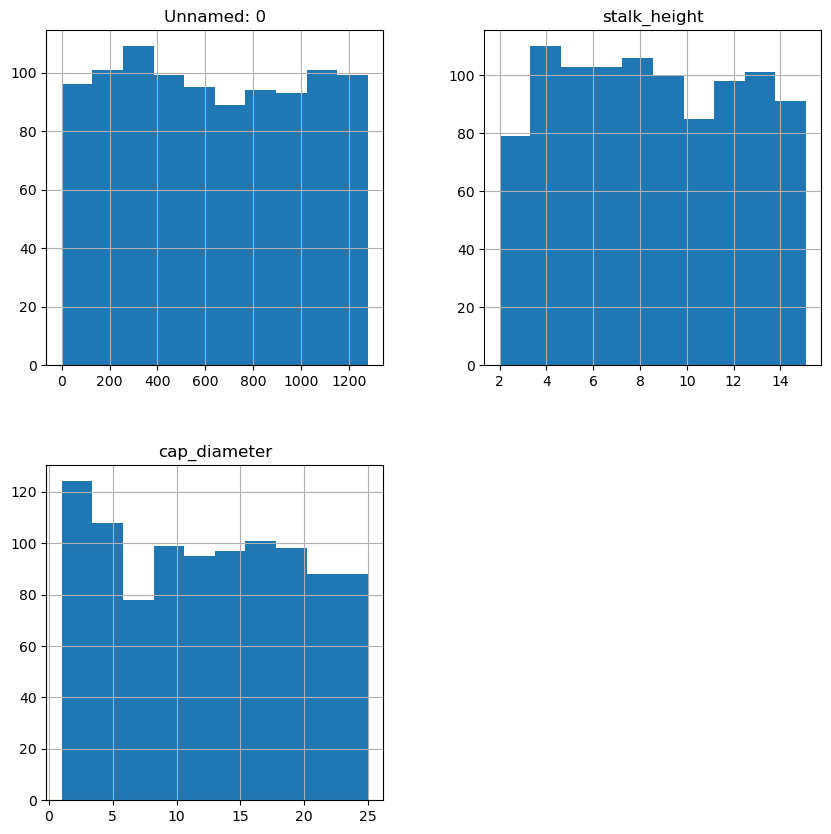

In [35]:
df.hist(figsize=(10, 10))  # Plot histograms for all features
plt.show()

<Axes: >

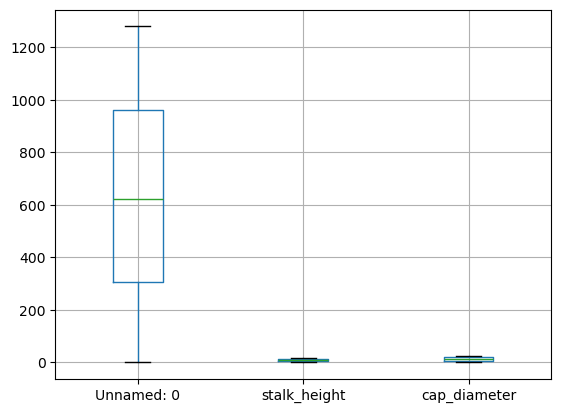

In [36]:
df.boxplot()

In [39]:
import seaborn as sns
df.corr

<bound method DataFrame.corr of       Unnamed: 0 cap_shape cap_surface cap_color bruises     odor  \
0           1167    sunken       scaly     white      no    anise   
1           1037    sunken     fibrous       red      no    anise   
2            309      flat     grooves    purple     yes     foul   
3            282      bell       scaly      pink     yes    fishy   
4            820      flat      smooth    yellow     yes    musty   
...          ...       ...         ...       ...     ...      ...   
1985         877   conical     grooves     brown      no     foul   
1988         926      bell     grooves      pink     yes    anise   
1989         289    sunken      smooth    purple     yes    anise   
1996        1160    sunken       scaly    purple     yes    musty   
1999        1073    convex       scaly    yellow     yes  pungent   

     gill_attachment gill_spacing gill_size gill_color  ...  veil_type  \
0         descending      distant     broad       pink  ...    pa

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 976 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                976 non-null    int64  
 1   cap_shape                 976 non-null    object 
 2   cap_surface               976 non-null    object 
 3   cap_color                 976 non-null    object 
 4   bruises                   976 non-null    object 
 5   odor                      976 non-null    object 
 6   gill_attachment           976 non-null    object 
 7   gill_spacing              976 non-null    object 
 8   gill_size                 976 non-null    object 
 9   gill_color                976 non-null    object 
 10  stalk_shape               976 non-null    object 
 11  stalk_root                976 non-null    object 
 12  stalk_surface_above_ring  976 non-null    object 
 13  stalk_surface_below_ring  976 non-null    object 
 14  stalk_color_ab

# Task 2: Data Preprocessing

In [44]:
from sklearn.preprocessing import LabelEncoder

In [46]:
label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

In [48]:
feature = df.drop('class', axis=1)
target= df['class']

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

In [52]:
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

      Unnamed: 0  cap_shape  cap_surface  cap_color  bruises  odor  \
990          449          2            0          0        0     0   
899           82          4            2          5        1     5   
33           541          1            0          4        0     2   
31           217          2            0          6        1     7   
1591         717          3            3          7        0     3   
...          ...        ...          ...        ...      ...   ...   
110          475          2            2          3        0     8   
301          100          1            0          0        1     6   
1512         216          3            1          8        0     1   
536           42          2            3          4        1     0   
105          873          4            3          1        0     4   

      gill_attachment  gill_spacing  gill_size  gill_color  ...  \
990                 3             1          0          10  ...   
899                 1    

# Task 3: Data Visualization

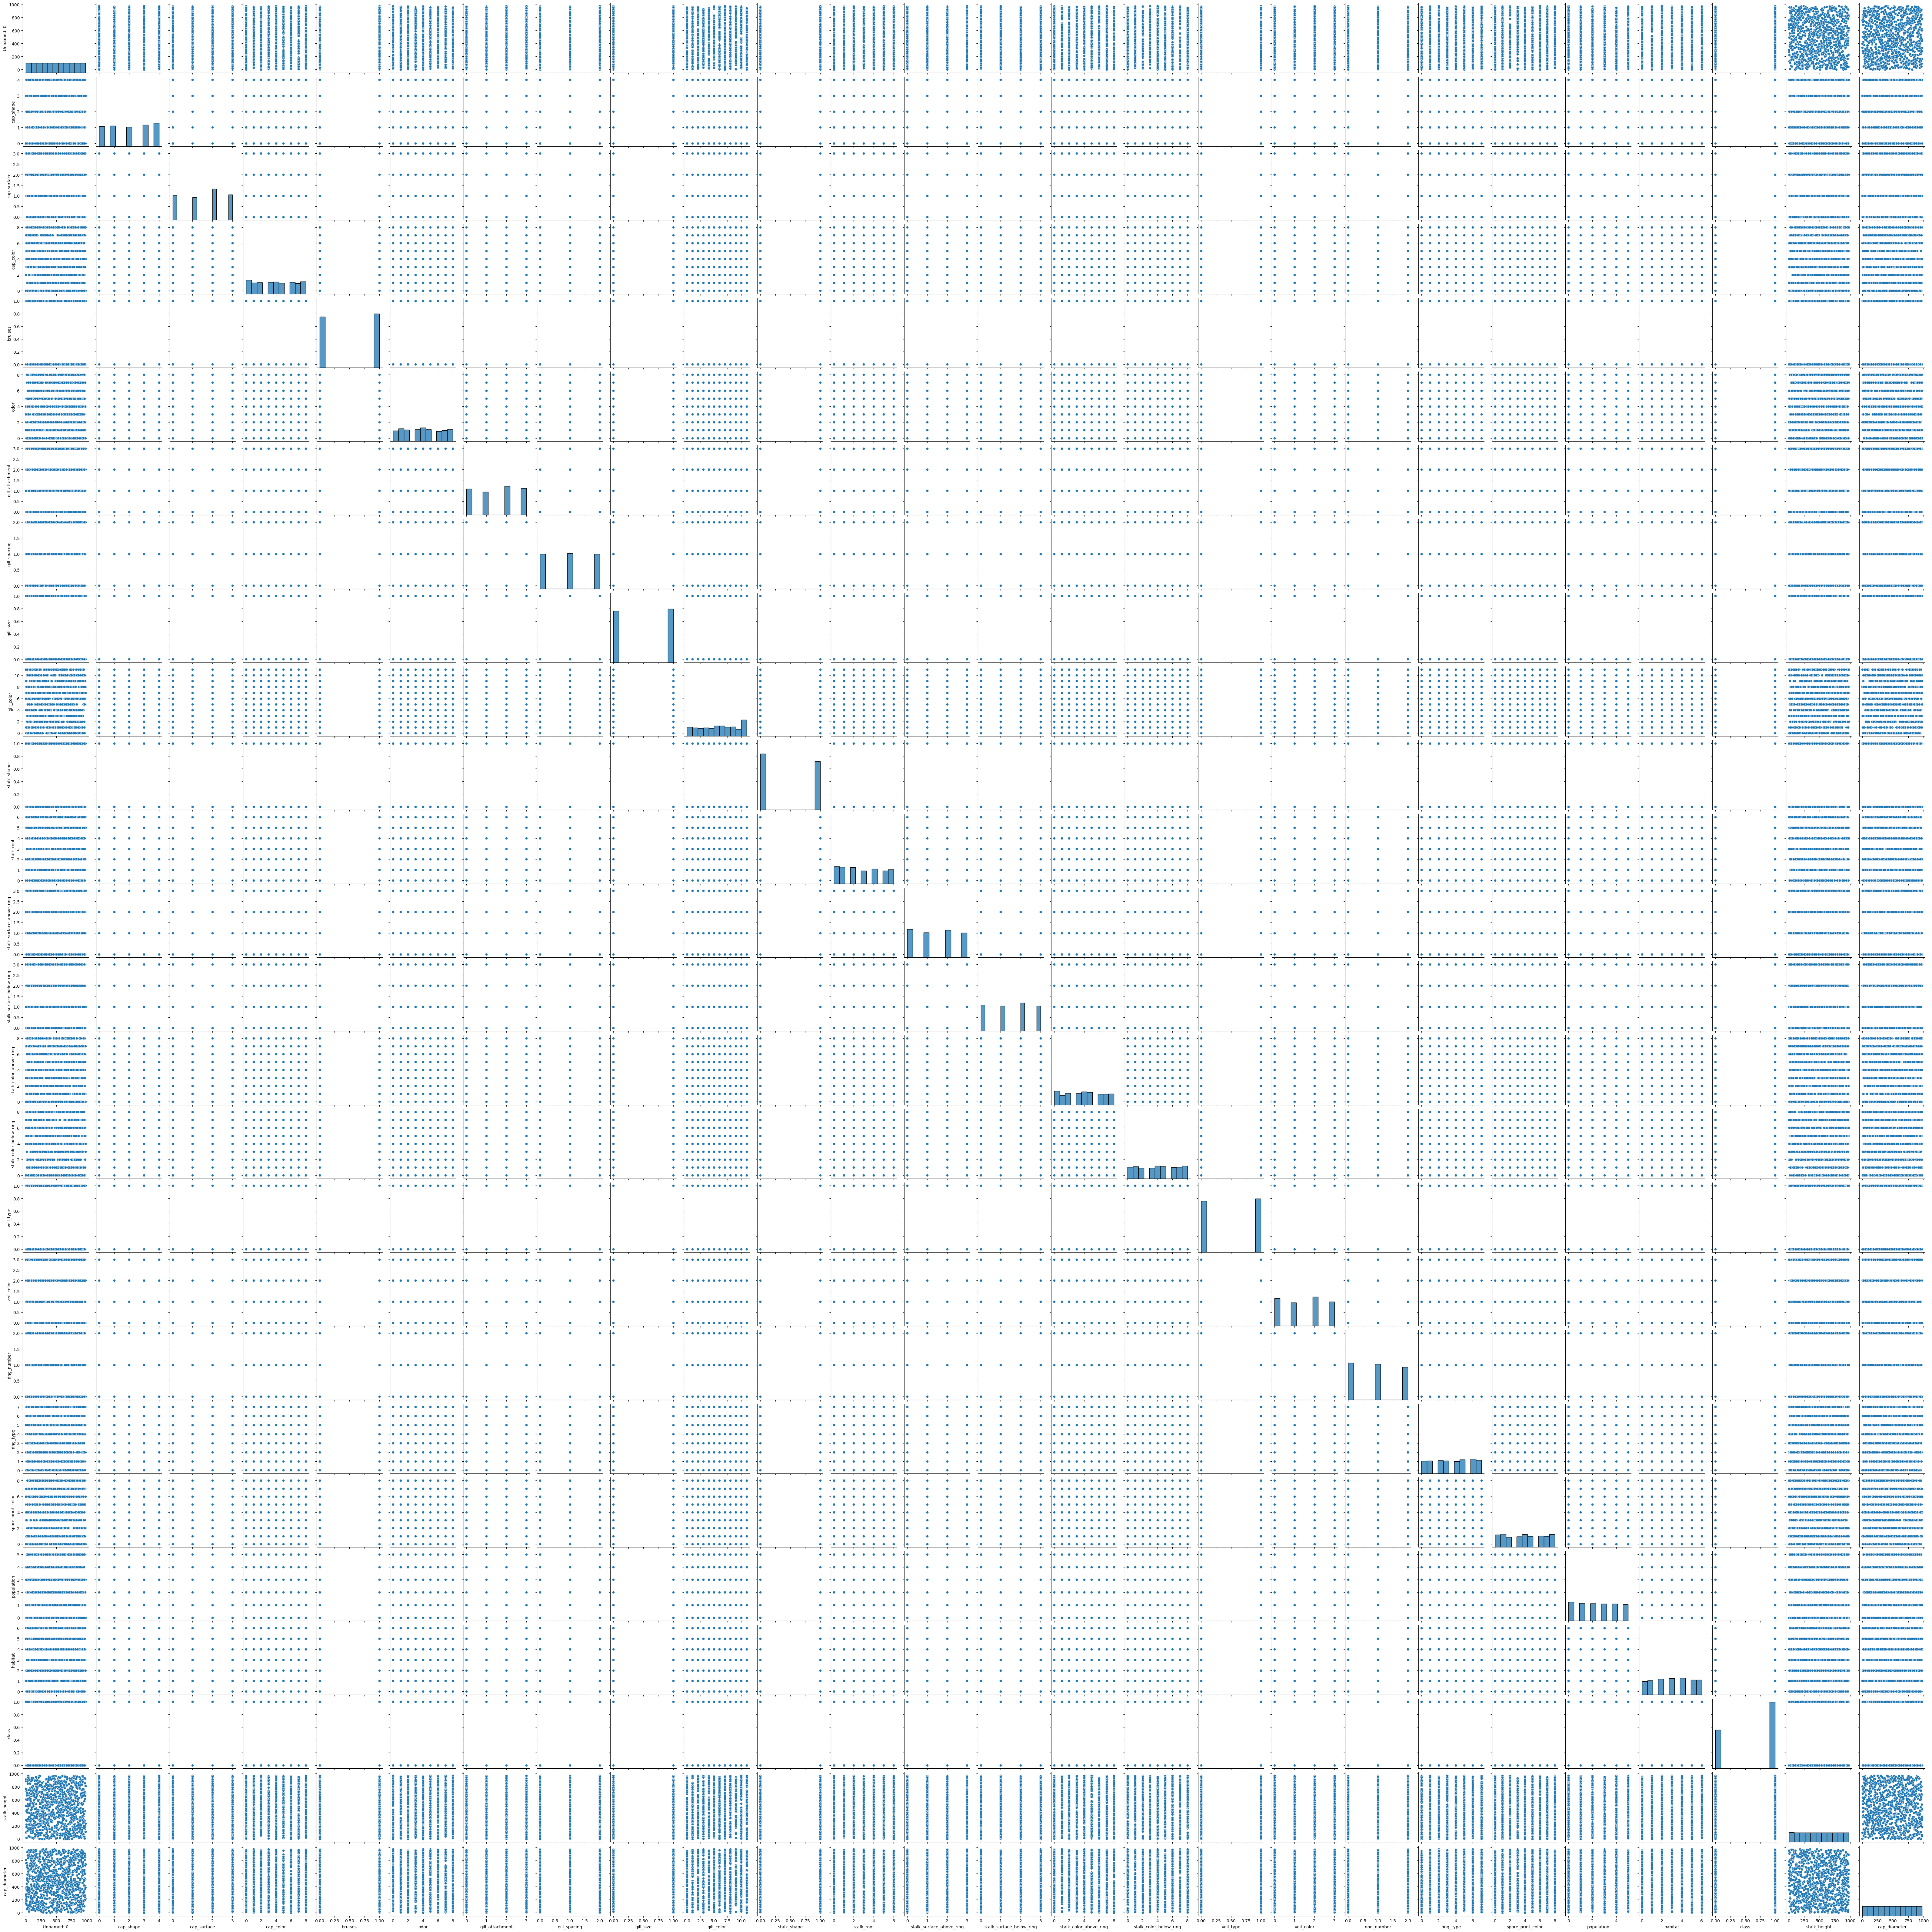

In [55]:
# Step 1: Visualize Feature Distributions and Relationships
import seaborn as sns
sns.pairplot(df)
plt.show()

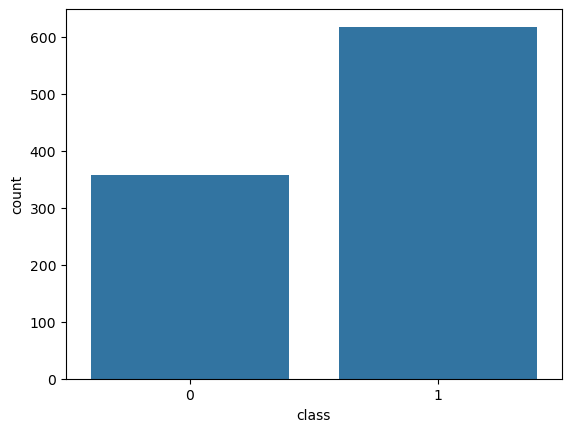

In [57]:
# Step 2: Visualize Class Distribution
sns.countplot(x='class', data=df)
plt.show()

# Task 4: SVM Implementation

In [60]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, Y_train)

SVC(kernel='linear')

In [62]:
# Step 2: Model Evaluation
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(Y_test, y_pred))

Accuracy: 0.6326530612244898
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.63      1.00      0.78       124

    accuracy                           0.63       196
   macro avg       0.32      0.50      0.39       196
weighted avg       0.40      0.63      0.49       196



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Task 5: Visualization of SVM Results

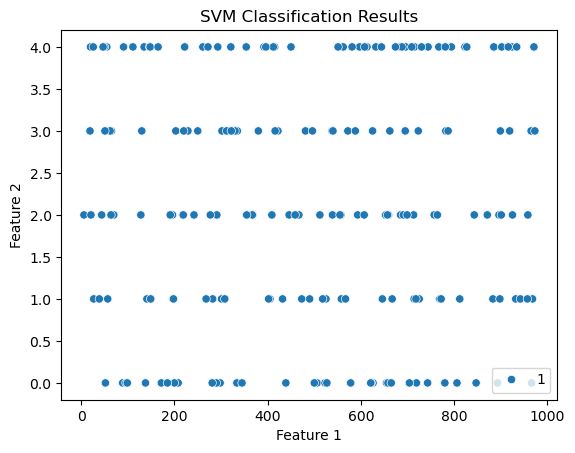

In [65]:
# Visualize Classification Results
sns.scatterplot(x=X_test.iloc[:, 0], y=X_test.iloc[:, 1], hue=y_pred)
plt.title('SVM Classification Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly', 'linear']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.628 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.635 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.635 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.635 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.635 total time=   0.0s


In [ ]:
grid_search.best_params_